In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from ast import literal_eval
import seaborn as sns

# Retrive the Data

In [8]:
df_game = pd.read_csv("/Users/medixdigital/Desktop/katia_projects/games.csv")
print(df_game.head(1))

       gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  \
0                  0              0               1                   1   

   t2_ban1  t2_ban2  t2_ban3  t2_ban4  t2_ban5  
0      114       67       43       16       51  

[1 rows x 61 columns]


In [9]:
df_champ_info2 = pd.read_json("/Users/medixdigital/Desktop/katia_projects/champion_info_2.json")
champ_info2 = pd.read_json((df_champ_info2["data"]).to_json(),orient = "index")
print(champ_info2.head(3))

                    tags                title   id     key    name
Aatrox   [Fighter, Tank]     the Darkin Blade  266  Aatrox  Aatrox
Ahri    [Mage, Assassin]  the Nine-Tailed Fox  103    Ahri    Ahri
Akali         [Assassin]   the Fist of Shadow   84   Akali   Akali


In [10]:
df_spell_info = pd.read_json("/Users/medixdigital/Desktop/katia_projects/summoner_spell_info.json")
spell_info = pd.read_json((df_spell_info["data"]).to_json(),orient = "index")
print(spell_info.head(3))

    id  summonerLevel      name               key  \
1    1              6   Cleanse     SummonerBoost   
11  11             10     Smite     SummonerSmite   
12  12              6  Teleport  SummonerTeleport   

                                          description  
1   Removes all disables (excluding suppression an...  
11  Deals 390-1000 true damage (depending on champ...  
12  After channeling for 4.5 seconds, teleports yo...  


# Clean the Data

In [11]:
df_game.drop(["gameId","creationTime","seasonId"],axis = 1,inplace = True)

In [12]:
print(df_game.head(2))

   gameDuration  winner  firstBlood  firstTower  firstInhibitor  firstBaron  \
0          1949       1           2           1               1           1   
1          1851       1           1           1               1           0   

   firstDragon  firstRiftHerald  t1_champ1id  t1_champ1_sum1  ...  \
0            1                2            8              12  ...   
1            1                1          119               7  ...   

   t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  \
0              5                  0              0               1   
1              2                  0              0               0   

   t2_riftHeraldKills  t2_ban1  t2_ban2  t2_ban3  t2_ban4  t2_ban5  
0                   1      114       67       43       16       51  
1                   0       11       67      238       51      420  

[2 rows x 58 columns]


In [13]:
champ_info2.drop(["name","title"],axis = 1, inplace = True)

In [14]:
print(champ_info2.head(3))

                    tags   id     key
Aatrox   [Fighter, Tank]  266  Aatrox
Ahri    [Mage, Assassin]  103    Ahri
Akali         [Assassin]   84   Akali


In [15]:
spell_info.drop(["name","description"], axis = 1, inplace = True)

In [16]:
print(spell_info.head(3))

    id  summonerLevel               key
1    1              6     SummonerBoost
11  11             10     SummonerSmite
12  12              6  SummonerTeleport


# Check the Data for Null

In [17]:
df_game.columns[df_game.isnull().any()]

Index([], dtype='object')

In [18]:
df_game.isnull().sum()

gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2        0
t2_champ3id           0
t2_champ3_sum1        0
t2_champ3_sum2  

# Prepare the Data

In [19]:
champ_info2.set_index(['id'], inplace=True)
champ_info2.head(3)

,tags,key
id,,
266,"[Fighter, Tank]",Aatrox
103,"[Mage, Assassin]",Ahri
84,[Assassin],Akali


In [20]:
champ_col = df_game.iloc[:,[8,11,14,17,20,33,36,39,42,45]]
champ_col.head(3)

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,8,432,96,11,112,104,498,122,238,412
1,119,39,76,10,35,54,25,120,157,92
2,18,141,267,68,38,69,412,126,24,22


In [21]:
ban_col = df_game.iloc[:,[28,29,30,31,32,53,54,55,56,57]]
ban_col.head(3)

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,92,40,69,119,141,114,67,43,16,51
1,51,122,17,498,19,11,67,238,51,420
2,117,40,29,16,53,157,238,121,57,28


In [22]:
def idToName(ID, dic):
    champ = dic['key'][ID]
    return champ

In [23]:
for i in champ_col:
    df_game[i] = df_game[i].apply(lambda x: idToName(x, champ_info2))

In [24]:
print(df_game["t1_champ1id"].head(3))

0    Vladimir
1      Draven
2    Tristana
Name: t1_champ1id, dtype: object


In [25]:
for j in ban_col:
    df_game[j] = df_game[j].apply(lambda x: idToName(x, champ_info2))

In [26]:
print(df_game["t1_ban1"].head(3))

0      Riven
1    Caitlyn
2       Lulu
Name: t1_ban1, dtype: object


In [88]:
def numToColor(data):
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

# Analyse the Data

In [27]:
# we can analyse firstly what are the most picked champions and what are the most popular bans

In [28]:
#champ picks 
champ_sum = pd.concat([df_game['t1_champ1id'],df_game['t1_champ2id'],df_game['t1_champ3id'],df_game['t1_champ4id'],df_game['t1_champ5id'],df_game['t2_champ1id'],df_game['t2_champ2id'],df_game['t2_champ3id'],df_game['t2_champ4id'],df_game['t2_champ5id']], ignore_index=True)

In [29]:
sorted_champ_sum = sorted(champ_sum)

In [30]:
#champ bans
champ_bans = pd.concat([df_game['t1_ban1'],df_game['t1_ban2'],df_game['t1_ban3'],df_game['t1_ban4'],df_game['t1_ban5'],df_game['t2_ban1'],df_game['t2_ban2'],df_game['t2_ban3'],df_game['t2_ban4'],df_game['t2_ban5']], ignore_index=True)

In [31]:
sorted_champ_bans = sorted(champ_bans)

[Text(0, 0, '712'),
 Text(0, 0, '4481'),
 Text(0, 0, '4501'),
 Text(0, 0, '696'),
 Text(0, 0, '587'),
 Text(0, 0, '877'),
 Text(0, 0, '2108'),
 Text(0, 0, '493'),
 Text(0, 0, '443'),
 Text(0, 0, '419'),
 Text(0, 0, '529'),
 Text(0, 0, '18795'),
 Text(0, 0, '2857'),
 Text(0, 0, '1381'),
 Text(0, 0, '10248'),
 Text(0, 0, '1739'),
 Text(0, 0, '1605'),
 Text(0, 0, '25175'),
 Text(0, 0, '646'),
 Text(0, 0, '22870'),
 Text(0, 0, '1624'),
 Text(0, 0, '640'),
 Text(0, 0, '20262'),
 Text(0, 0, '2750'),
 Text(0, 0, '1261'),
 Text(0, 0, '1426'),
 Text(0, 0, '806'),
 Text(0, 0, '286'),
 Text(0, 0, '14855'),
 Text(0, 0, '13291'),
 Text(0, 0, '2072'),
 Text(0, 0, '821'),
 Text(0, 0, '1869'),
 Text(0, 0, '1974'),
 Text(0, 0, '1768'),
 Text(0, 0, '224'),
 Text(0, 0, '658'),
 Text(0, 0, '694'),
 Text(0, 0, '3085'),
 Text(0, 0, '1143'),
 Text(0, 0, '623'),
 Text(0, 0, '21390'),
 Text(0, 0, '2043'),
 Text(0, 0, '4934'),
 Text(0, 0, '2196'),
 Text(0, 0, '1670'),
 Text(0, 0, '880'),
 Text(0, 0, '900'),
 Te

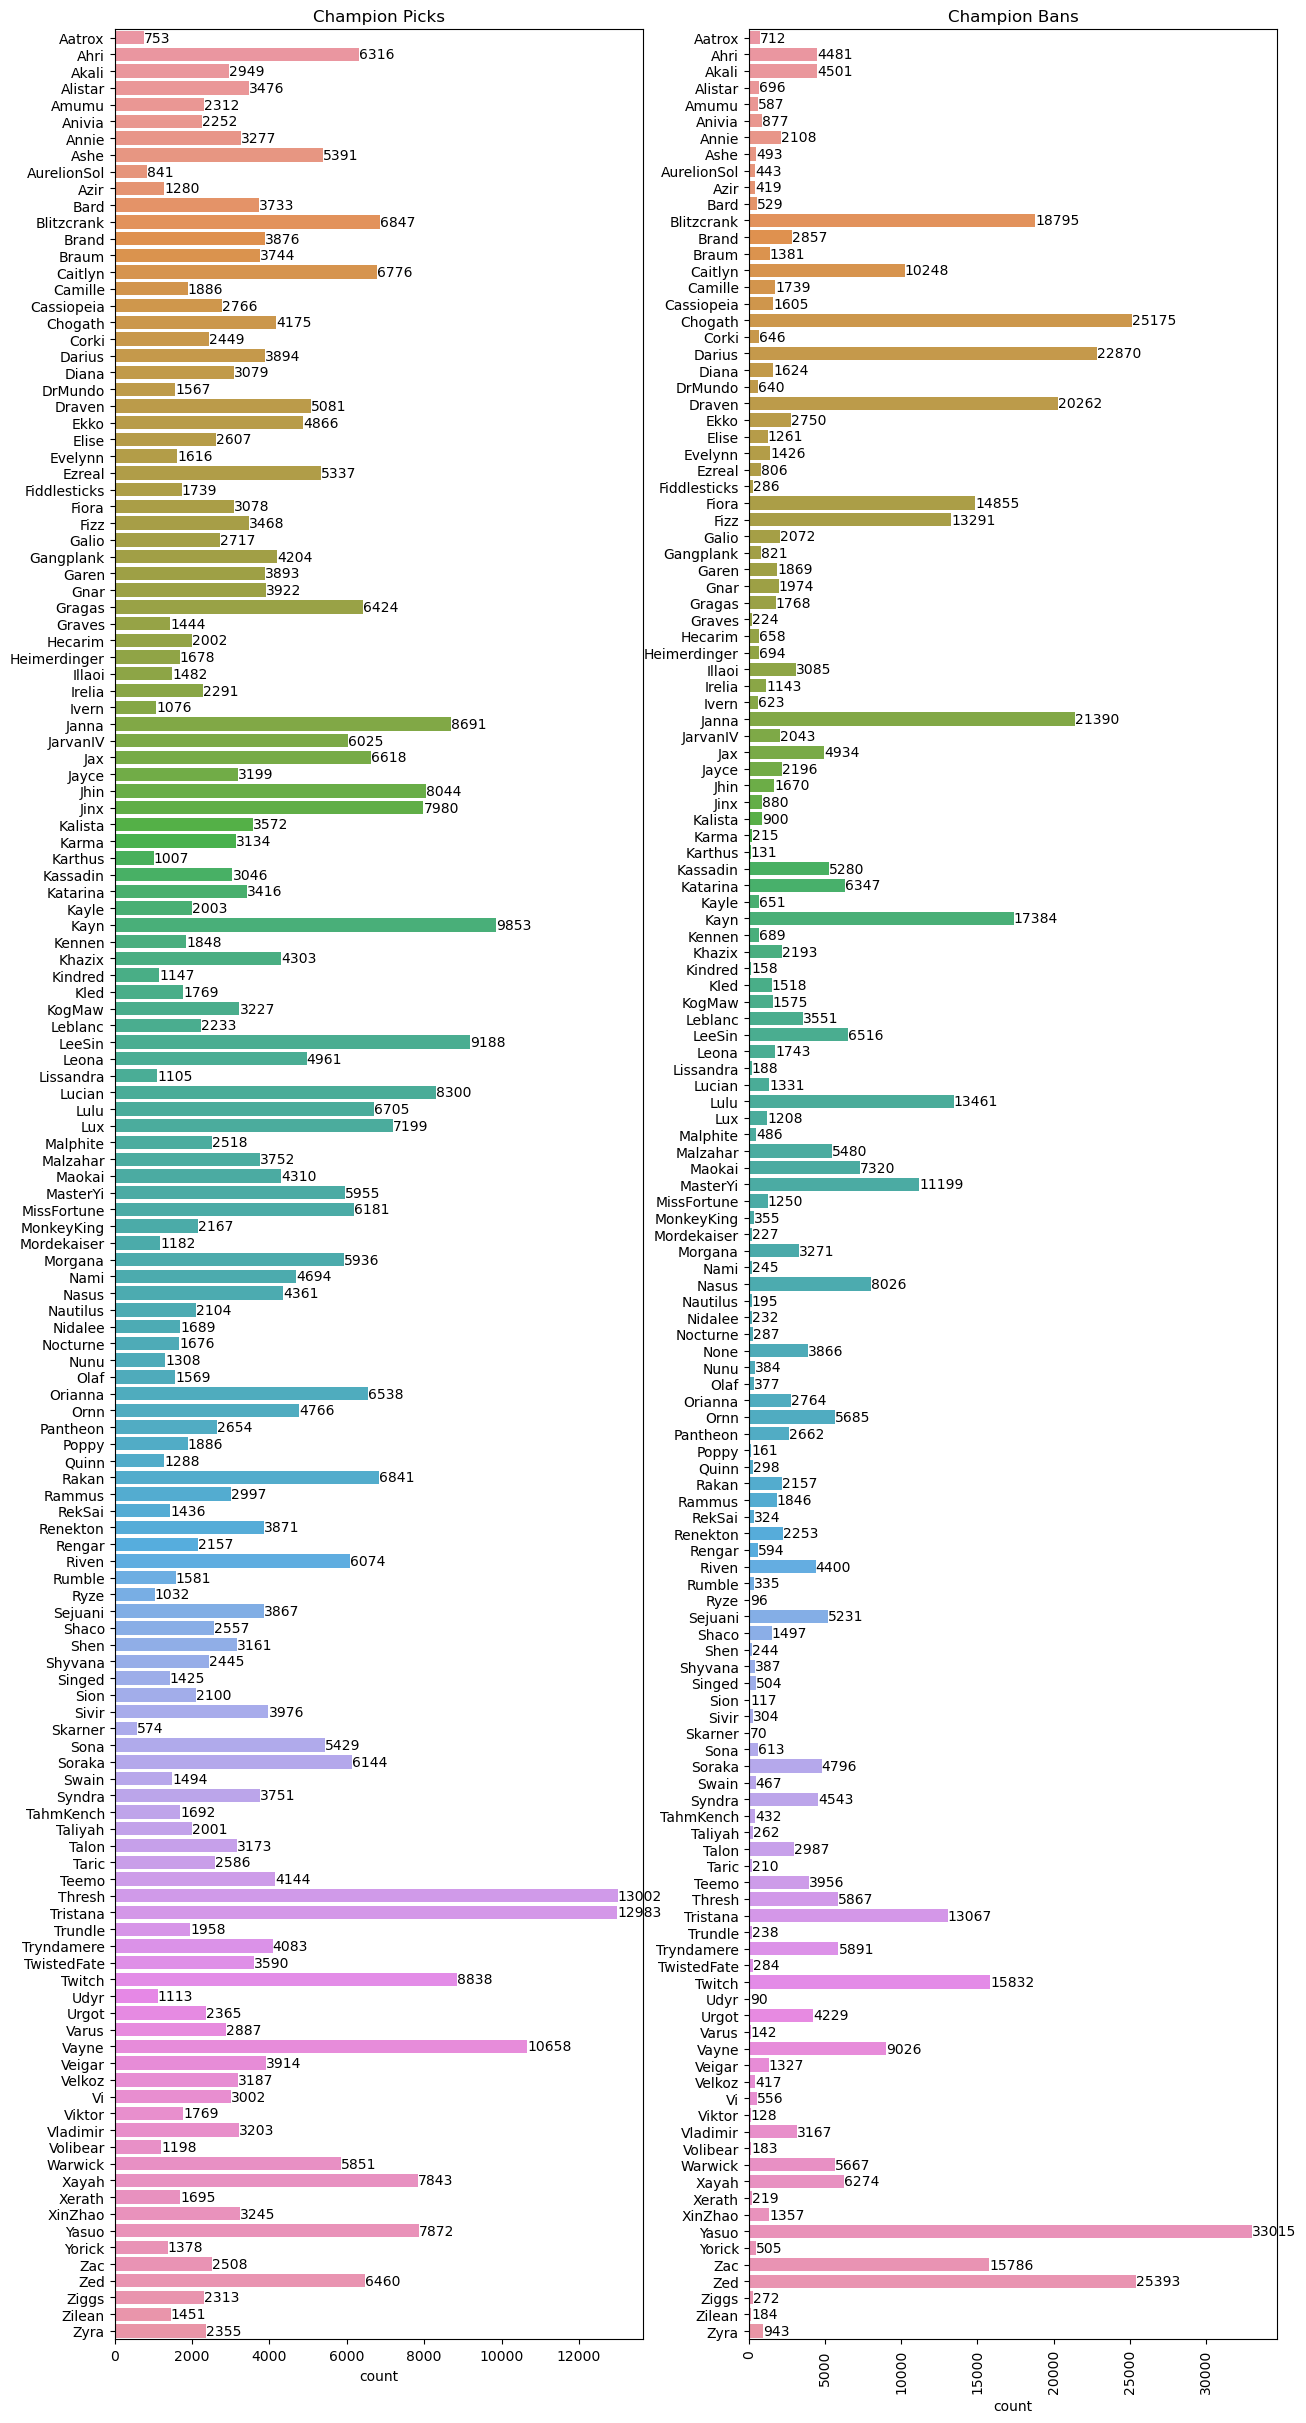

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sorted_champ_sum, data=df_game, ax=ax1)
sns.countplot(y=sorted_champ_bans, data=df_game, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])

In [33]:
# We can see that the most playble champions are Tresh, Tristina and Vayne.
# Also, we can see that players hate the most playing against Yasue, zed and Chogath.

In [91]:
data_clean = df_game.replace([0,1,2],['neither','blue','red'])
data_clean.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,blue,red,blue,blue,blue,blue,red,Vladimir,12,...,5,neither,neither,blue,blue,Fiora,Vayne,Karma,Soraka,Caitlyn
1,1851,blue,blue,blue,blue,neither,blue,blue,Draven,7,...,red,neither,neither,neither,neither,MasterYi,Vayne,Zed,Caitlyn,Illaoi
2,1493,blue,red,blue,blue,blue,red,neither,Tristana,4,...,red,neither,neither,blue,neither,Yasuo,Zed,Khazix,Maokai,Evelynn
3,1758,blue,blue,blue,blue,blue,blue,neither,Maokai,4,...,neither,neither,neither,neither,neither,Camille,Tristana,Kayn,Janna,Caitlyn
4,2094,blue,red,blue,blue,blue,blue,neither,Warwick,4,...,3,neither,neither,blue,neither,Garen,MasterYi,Braum,Darius,Tristana


In [92]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
first_totals = data_clean[firsts].apply(pd.value_counts)
new_index = ['blue','red','neither']
first_sort = first_totals.reindex(index=new_index)
first_sort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


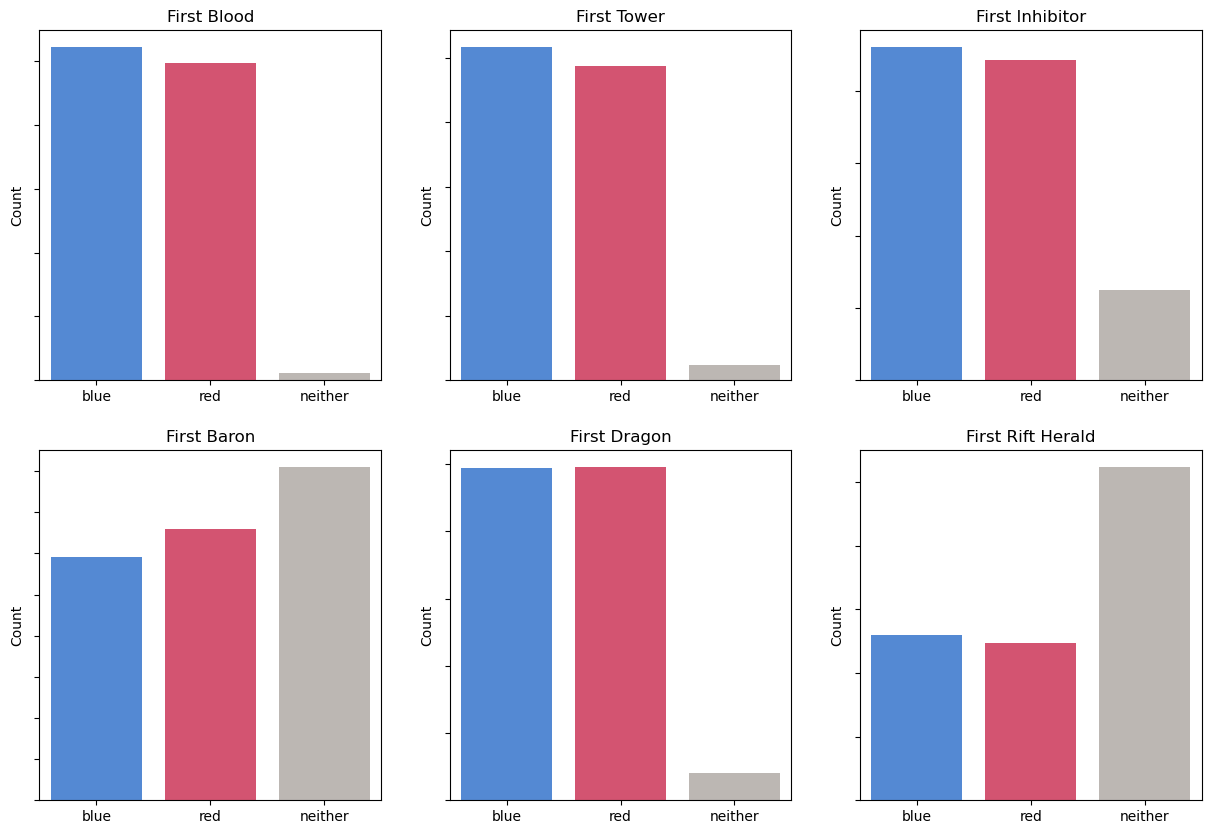

In [96]:
plotColors = ['#3f85e8','#e83f66','#bdb7b1']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

# Multiple Linear Regression

In [39]:
mlr_table = df_game.iloc[:,[0,23,24,25,26,27,48,49,50,51,52]]
mlr_table.head(3)

,gameDuration,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,11,1,2,3,0,5,0,0,1,1
1,1851,10,4,0,2,1,2,0,0,0,0
2,1493,8,1,1,1,0,2,0,0,1,0


In [40]:
x = mlr_table.drop(['gameDuration'], axis=1).values
y = mlr_table['gameDuration'].values

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
ml =  LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = ml.predict(x_test)
print(y_pred)

[2124.85479973 1427.25661706 2022.77132914 ... 2266.97206556 2397.84476591
 2393.90847552]


In [44]:
ml.predict([[9,2,2,2,1,6,0,0,1,2]])

array([1958.18210032])

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8023580904403776

Text(0.5, 1.0, 'Actual vs Predicted')

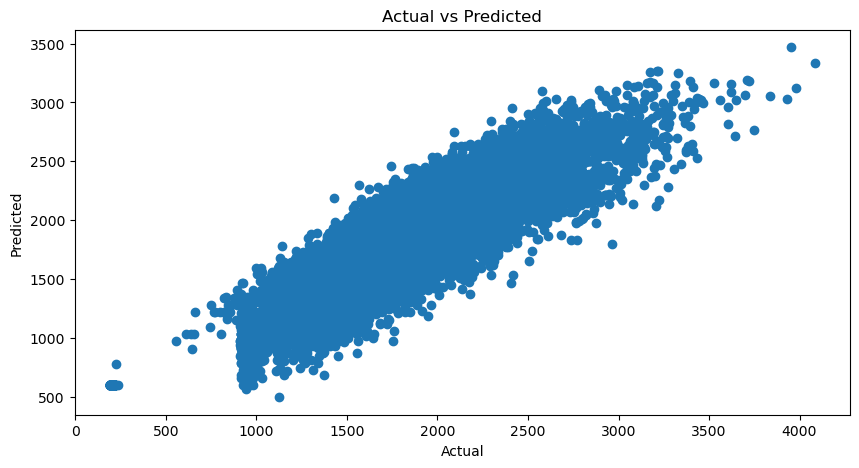

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [47]:
pred_y_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value' : y_pred, 'Diffrence': y_test-y_pred})
pred_y_df.head(5)

,Actual Value,Predicted Value,Diffrence
0,2047,2124.854800,-77.854800
1,1499,1427.256617,71.743383
2,1860,2022.771329,-162.771329
3,2240,2102.792791,137.207209
4,207,598.930615,-391.930615


In [48]:
"""
in summary we can see that the coefficient of determination is very good - 0.8 meaning that 0.8 of the
dependent variable variance is explained by the model's 10 independent variables that we chose.
"""

"\nin summary we can see that the coefficient of determination is very good - 0.8 meaning that 0.8 of the\ndependent variable variance is explained by the model's 10 independent variables that we chose.\n"